# 시계열 예측 문제

- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

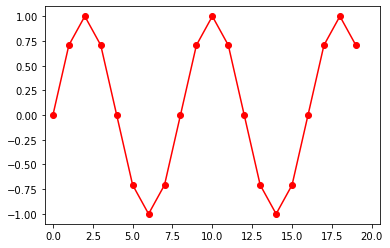

In [4]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

## 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환

### (대각선 위의 성분들이 같은 정사각 행렬)

In [5]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] -2)], s[::-1]))
S[:5, :3]
# x와 y라는 훈련용 데이터를 만들기 위한 과정

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [6]:
X_train = S[:-1, :3][:,:,np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [8]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

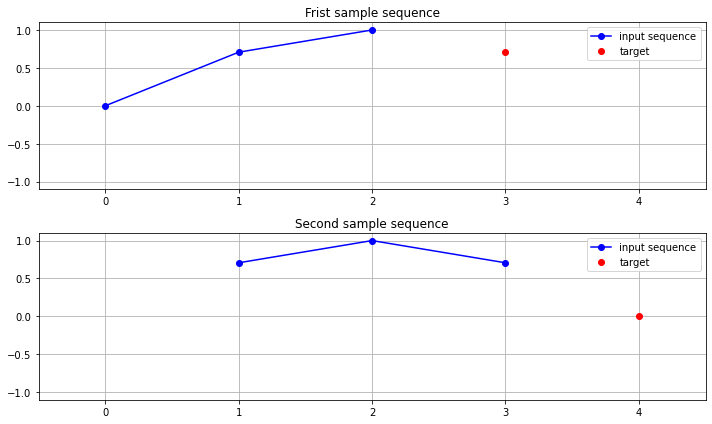

In [10]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label = "input sequence")
plt.plot([3], Y_train[0], 'ro', label = 'target')
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Frist sample sequence")

plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4], Y_train[1], 'ro', label = 'target')
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

## RNN으로 해결 = SimpleRNN() 사용

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

Using TensorFlow backend.


In [12]:

model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))  
#SimpleRNN(노드수, input_shape=(input, output))
model.add(Dense(1, activation = "linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = 'mse', optimizer ='sgd')

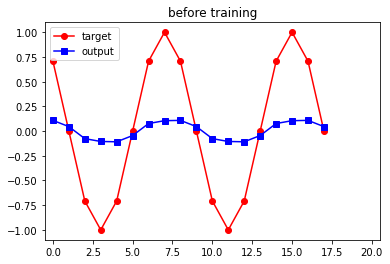

In [15]:
plt.plot(Y_train, 'ro-', label = 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label = 'output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title('before training')
plt.show()

In [16]:
history = model.fit(X_train, Y_train, epochs =100)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3665
Epoch 2/100
18/18 [==============================] - 0s 0us/step - loss: 0.3462
Epoch 3/100
18/18 [==============================] - 0s 349us/step - loss: 0.3269
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.3087
Epoch 5/100
18/18 [==============================] - 0s 0us/step - loss: 0.2915
Epoch 6/100
18/18 [==============================] - 0s 55us/step - loss: 0.2752
Epoch 7/100
18/18 [==============================] - 0s 55us/step - loss: 0.2598
Epoch 8/100
18/18 [==============================] - 0s 54us/step - loss: 0.2451
Epoch 9/100
18/18 [==============================] - 0s 55us/step - loss: 0.2313
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 0.2182
Epoch 11/100
18/18 [==============================] - 0s 55us/step - loss: 0.2058
Epoch 12/100
18/18 [==============================] - 0s 55us/step - loss: 0.1940
Epoch 13/100
18/18 [=======

## 결과 확인 (분류가 아니기때문에 정확도 x)

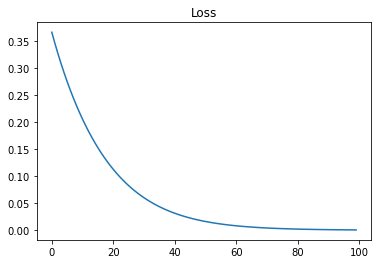

In [17]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

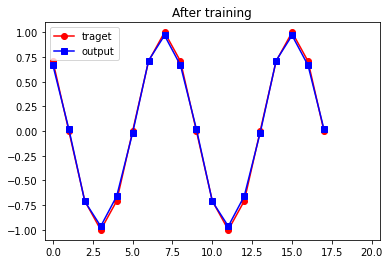

In [19]:
plt.plot(Y_train, 'ro-', label = 'traget')
plt.plot(model.predict(X_train[:,:,:]),'bs-',label = 'output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [21]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_1/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.31113496, -0.5350309 , -0.1710661 , -0.3513309 , -0.58144826,
         0.41476998,  0.3126239 , -0.04758061, -0.43024546, -0.25811166]],
      dtype=float32)>

In [22]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_1/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.29332197, -0.02267686, -0.45017317, -0.06278142,  0.38479894,
        -0.499793  , -0.3209854 , -0.01187507,  0.20133896, -0.40036467],
       [ 0.40109155, -0.18653043, -0.5243529 ,  0.14630622,  0.17135185,
         0.6216256 , -0.09945873, -0.1311867 , -0.1243751 , -0.27204865],
       [-0.19665305, -0.1720411 ,  0.36357763,  0.30392343, -0.11612891,
         0.28862143,  0.17779362,  0.09661648,  0.46272904, -0.6623994 ],
       [-0.07720977,  0.48544714, -0.09584784, -0.17508774, -0.31796277,
         0.290148  , -0.6028821 ,  0.2716179 ,  0.3168384 ,  0.10557304],
       [-0.18821228, -0.29480058, -0.22804125,  0.6970458 , -0.02637194,
         0.12681808, -0.02304816, -0.2356683 ,  0.49735203,  0.49945667],
       [ 0.08335648,  0.07700554,  0.4568554 ,  0.2812518 ,  0.6416771 ,
        -0.04727153, -0.4047447 ,  0.31673926, -0.2945453 ,  0.05634448],
       [ 0.35910776,  0.3381388 , 

In [23]:
# bias
model.weights[2]

<tf.Variable 'simple_rnn_1/bias:0' shape=(10,) dtype=float32, numpy=
array([ 1.0906372e-03, -5.2150848e-05,  6.3192711e-04, -6.1487983e-04,
        3.8400162e-03, -1.4719464e-03,  3.9028819e-03, -2.5122187e-03,
       -8.0384471e-04, -1.4883882e-03], dtype=float32)>

# 모델2(RNN LAYER 5)

In [37]:
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [38]:
x_train = S[:-1, :3][:, :, np.newaxis]
y_train = S[:-1, 3]
x_train.shape, y_train.shape

((18, 3, 1), (18,))

In [39]:
model2 = Sequential()
model2.add(SimpleRNN(5, input_shape=(3, 1)))  
#SimpleRNN(노드수, input_shape=(input, output))
model2.add(Dense(1, activation = "linear"))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [46]:
model2.compile(loss='mse', optimizer='sgd')

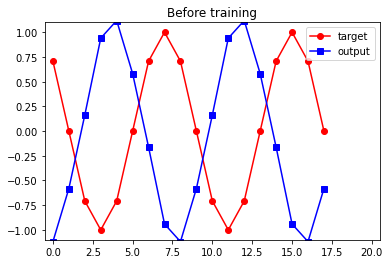

In [47]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model2.predict(x_train[:,:,:]), 'bs-', label = "output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [48]:
history = model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 4ms/step - loss: 2.0243
Epoch 2/100
18/18 [==============================] - 0s 0us/step - loss: 1.9126
Epoch 3/100
18/18 [==============================] - 0s 743us/step - loss: 1.8091
Epoch 4/100
18/18 [==============================] - 0s 60us/step - loss: 1.7131
Epoch 5/100
18/18 [==============================] - 0s 0us/step - loss: 1.6238
Epoch 6/100
18/18 [==============================] - 0s 0us/step - loss: 1.5406
Epoch 7/100
18/18 [==============================] - 0s 0us/step - loss: 1.4631
Epoch 8/100
18/18 [==============================] - 0s 0us/step - loss: 1.3906
Epoch 9/100
18/18 [==============================] - 0s 55us/step - loss: 1.3227
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 1.2591
Epoch 11/100
18/18 [==============================] - 0s 56us/step - loss: 1.1994
Epoch 12/100
18/18 [==============================] - 0s 0us/step - loss: 1.1433
Epoch 13/100
18/18 [===========

## 결과확인(model2)

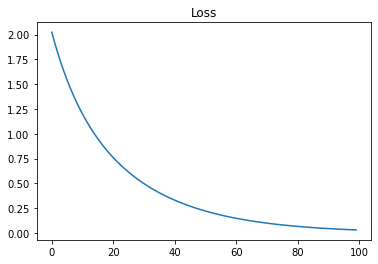

In [49]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

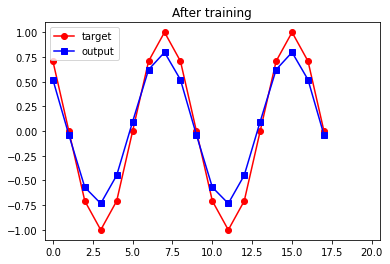

In [50]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model2.predict(x_train[:,:,:]), 'bs-', label = 'output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

# 모델3(RNN LAYER 20)

In [52]:
model3 = Sequential()
model3.add(SimpleRNN(20, input_shape=(3, 1)))  
#SimpleRNN(노드수, input_shape=(input, output))
model3.add(Dense(1, activation = "linear"))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [53]:
model3.compile(loss='mse', optimizer='sgd')

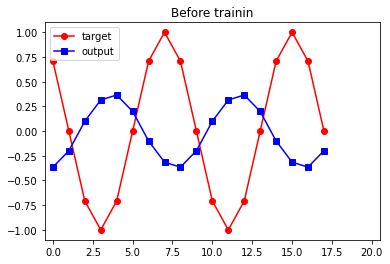

In [56]:
plt.plot(y_train, 'ro-',label = 'target')
plt.plot(model3.predict(x_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before trainin")
plt.show()

In [57]:
histoy = model3.fit(x_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8589
Epoch 2/100
18/18 [==============================] - 0s 0us/step - loss: 0.7799
Epoch 3/100
18/18 [==============================] - 0s 502us/step - loss: 0.7085
Epoch 4/100
18/18 [==============================] - 0s 53us/step - loss: 0.6437
Epoch 5/100
18/18 [==============================] - 0s 54us/step - loss: 0.5848
Epoch 6/100
18/18 [==============================] - 0s 55us/step - loss: 0.5314
Epoch 7/100
18/18 [==============================] - 0s 55us/step - loss: 0.4827
Epoch 8/100
18/18 [==============================] - 0s 55us/step - loss: 0.4385
Epoch 9/100
18/18 [==============================] - 0s 56us/step - loss: 0.3982
Epoch 10/100
18/18 [==============================] - 0s 0us/step - loss: 0.3615
Epoch 11/100
18/18 [==============================] - 0s 54us/step - loss: 0.3281
Epoch 12/100
18/18 [==============================] - 0s 55us/step - loss: 0.2977
Epoch 13/100
18/18 [=======

## 결과확인(model3)

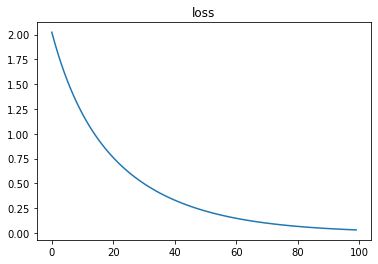

In [58]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

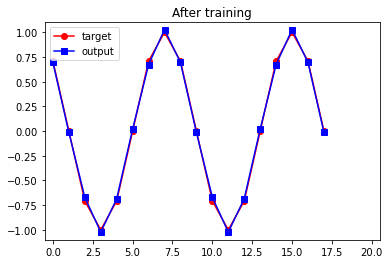

In [60]:
plt.plot(y_train, 'ro-', label = 'target')
plt.plot(model3.predict(x_train[:,:,:]), 'bs-', label = 'output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [ ]:
# RNN LAYER 20인 것이 가장 정확하다(RNN도 깊으면 좀 더 잘해낼 수 있을 가능성이 높다)